In [1]:
# Importing the usual libraries

import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

In [2]:
df = pd.read_excel("BaumgartnerDVDData.xlsx")
df.head()

,Salesperson,District,Region,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district
0,Addie Miller,52,A,393,16,2,4,30,500
1,Addie Miller,67,A,267,11,2,1,14,627
2,Addie Miller,104,A,148,4,1,1,17,778
3,Alexandra Jones,49,A,317,17,0,7,1,530
4,Alonzo Tennant,46,A,276,16,2,2,22,770


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Salesperson                       100 non-null    object
 1   District                          100 non-null    int64 
 2   Region                            100 non-null    object
 3   Sales                             100 non-null    int64 
 4   # of Clients                      100 non-null    int64 
 5    Visits to each Client per Month  100 non-null    int64 
 6   Calls to each Client per month    100 non-null    int64 
 7   Emails to each Client per month   100 non-null    int64 
 8   # of businesses in district       100 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 7.2+ KB


In [4]:
df.describe()

,District,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,76.500000,269.670000,13.500000,1.020000,3.820000,16.290000,481.100000
std,29.011492,119.831536,5.857741,0.816249,2.591283,9.143409,277.797015
min,27.000000,56.000000,2.000000,0.000000,0.000000,0.000000,22.000000
25%,51.750000,179.000000,9.000000,0.000000,1.750000,8.750000,247.000000
50%,76.500000,250.500000,13.500000,1.000000,4.000000,17.500000,481.000000
75%,101.250000,349.250000,19.000000,2.000000,6.000000,24.250000,713.250000
max,126.000000,571.000000,22.000000,2.000000,8.000000,30.000000,987.000000


<AxesSubplot:xlabel=' Visits to each Client per Month', ylabel='Count'>

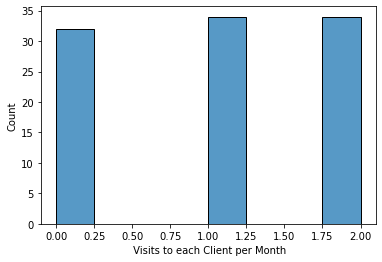

In [5]:
# Visualizing distribution (to understand central tendency) for
#1. Visits to clients

sns.histplot(df[" Visits to each Client per Month"], kde = False)

# mean is okay to use

<AxesSubplot:xlabel='Calls to each Client per month', ylabel='Count'>

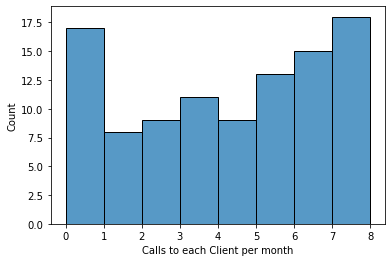

In [6]:
# Visualizing distribution (to understand central tendency) for
#2. Calls to each Client per month

sns.histplot(df["Calls to each Client per month"], kde = False)

# bimodal data
# mean is okay

<AxesSubplot:xlabel='Emails to each Client per month', ylabel='Count'>

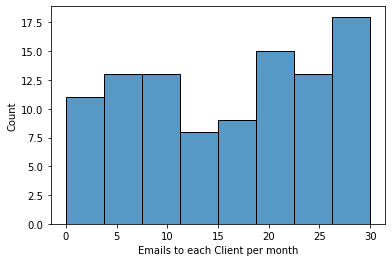

In [7]:
# Visualizing distribution (to understand central tendency) for
#3. Emails to each Client per month

sns.histplot(df["Emails to each Client per month"], kde = False)

# skewed slightly to left
# mean is okay

<AxesSubplot:xlabel='Sales', ylabel='Count'>

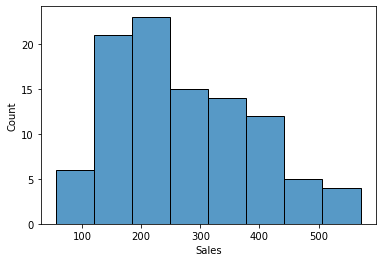

In [8]:
# Visualizing distribution (to understand central tendency) for
#4. Sales

sns.histplot(df["Sales"], kde = False)

# skewed right

<AxesSubplot:xlabel='# of businesses in district', ylabel='Count'>

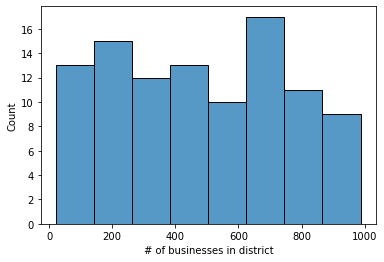

In [9]:
# Visualizing distribution (to understand central tendency) for
#5. # businesses in district

sns.histplot(df["# of businesses in district"], kde = False)

# use mean

<AxesSubplot:xlabel='# of Clients', ylabel='Count'>

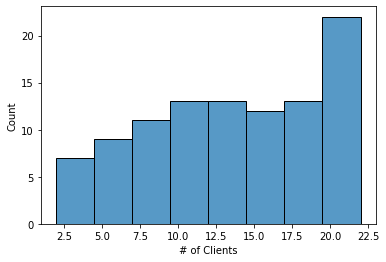

In [10]:
# Visualizing distribution (to understand central tendency) for
#6. # clients

sns.histplot(df["# of Clients"], kde = False)

# use mean

# INVESTIGATE CORRELATIONS

In [12]:
#1. Visits vs. Sales

df["Sales"].groupby(df[" Visits to each Client per Month"]).mean()

 Visits to each Client per Month
0    310.000000
1    254.058824
2    247.323529
Name: Sales, dtype: float64

In [13]:
#2. Visits vs. Sales

df["Sales"].groupby(df["Calls to each Client per month"]).mean()

Calls to each Client per month
0    282.117647
1    220.250000
2    352.333333
3    296.727273
4    249.888889
5    234.153846
6    233.800000
7    284.500000
8    293.333333
Name: Sales, dtype: float64

In [14]:
#3. Emails vs. Sales

df["Sales"].groupby(df["Emails to each Client per month"]).mean()

Emails to each Client per month
0     263.000000
1     327.333333
2     327.500000
3     246.600000
4     276.000000
5     257.000000
6     268.500000
7     254.000000
8     348.000000
9     285.500000
10    294.250000
11    264.666667
12    554.000000
13    368.500000
14    262.200000
16    261.500000
17    309.000000
18    268.500000
19    192.500000
20    244.750000
21    217.500000
22    233.000000
23    256.333333
24    220.000000
25    282.666667
26    225.750000
27    286.428571
28    239.333333
29    236.666667
30    314.800000
Name: Sales, dtype: float64

In [15]:
#4. # Clients vs. Sales

df["Sales"].groupby(df["# of Clients"]).mean()

# increase in # clients correlated with increase in sales

# of Clients
2      64.000000
4     131.000000
5     119.200000
6     132.750000
7     177.333333
8     160.600000
9     236.333333
10    198.571429
11    234.166667
12    225.750000
13    252.666667
14    328.333333
15    301.166667
16    326.000000
17    351.000000
18    357.666667
19    309.200000
20    399.000000
21    443.142857
22    353.444444
Name: Sales, dtype: float64

In [16]:
#5. # Businesses vs. Sales

df["Sales"].groupby(df["# of businesses in district"]).mean()

# increase in # clients correlated with decrease in sales

# of businesses in district
22     311.0
23     299.0
25     216.0
26     140.0
33     159.0
       ...  
926    139.0
931    394.0
952    140.0
965    229.0
987    148.0
Name: Sales, Length: 96, dtype: float64

In [17]:
df.corr()

# strongest predictor of sales is # of clients
# interesting: visits, calls, and emails have negative correlation with sales

,District,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district
District,1.000000,-0.032320,-0.046005,-0.095121,0.110715,-0.186112,0.043959
Sales,-0.032320,1.000000,0.793376,-0.211737,-0.061219,-0.079260,0.066138
# of Clients,-0.046005,0.793376,1.000000,-0.274635,-0.174350,-0.030835,-0.078176
Visits to each Client per Month,-0.095121,-0.211737,-0.274635,1.000000,0.068578,0.199522,0.081200
Calls to each Client per month,0.110715,-0.061219,-0.174350,0.068578,1.000000,-0.010564,-0.183529
Emails to each Client per month,-0.186112,-0.079260,-0.030835,0.199522,-0.010564,1.000000,0.089644
# of businesses in district,0.043959,0.066138,-0.078176,0.081200,-0.183529,0.089644,1.000000


# FINDING OUTLIERS

In [19]:
#1. z-score method for # visits

# creating a new column with z-scores for # visits

df["zscoreVisits"] = np.abs(stats.zscore(df[" Visits to each Client per Month"]))

# Find the z-score outliers

outliersVisits = df.loc[df["zscoreVisits"]>3].index

print(outliersVisits)

# no outliers using z-score method

Int64Index([], dtype='int64')


In [22]:
#1. IQR method for # visits

# determine IQR and outliers of # visits column

q1 = df[" Visits to each Client per Month"].quantile(.25)
q3 = df[" Visits to each Client per Month"].quantile(.75)

iqr = q3 - q1

outlierVisitsLow = q1 - (1.5*iqr)
outlierVisitsHigh = q3 + (1.5*iqr)

print("The lower outlier limit for visits is: ", outlierVisitsLow)
print("The upper outlier limit for visits is: ", outlierVisitsHigh)

visitsOutliers = df.loc[(df[" Visits to each Client per Month"] < outlierVisitsLow) | (df[" Visits to each Client per Month"] > outlierVisitsHigh)].index

print(visitsOutliers)

The lower outlier limit for visits is:  -3.0
The upper outlier limit for visits is:  5.0
Int64Index([], dtype='int64')


In [21]:
#2. z-score method for # calls

# creating a new column with z-scores for # calls

df["zscoreCalls"] = np.abs(stats.zscore(df["Calls to each Client per month"]))

# Find the z-score outliers

outliersCalls = df.loc[df["zscoreCalls"]>3].index

print(outliersCalls)

# no outliers using z-score method

Int64Index([], dtype='int64')


In [23]:
#2. IQR method for # calls

# determine IQR and outliers of # calls column

q1 = df["Calls to each Client per month"].quantile(.25)
q3 = df["Calls to each Client per month"].quantile(.75)

iqr = q3 - q1

outlierCallsLow = q1 - (1.5*iqr)
outlierCallsHigh = q3 + (1.5*iqr)

print("The lower outlier limit for calls is: ", outlierCallsLow)
print("The upper outlier limit for calls is: ", outlierCallsHigh)

callsOutliers = df.loc[(df["Calls to each Client per month"] < outlierCallsLow) | (df["Calls to each Client per month"] > outlierCallsHigh)].index

print(callsOutliers)

The lower outlier limit for calls is:  -4.625
The upper outlier limit for calls is:  12.375
Int64Index([], dtype='int64')


In [24]:
#3. z-score method for # emails

# creating a new column with z-scores for # emails

df["zscoreEmails"] = np.abs(stats.zscore(df["Emails to each Client per month"]))

# Find the z-score outliers

outliersEmails = df.loc[df["zscoreEmails"]>3].index

print(outliersEmails)

# no outliers using z-score method

Int64Index([], dtype='int64')


In [25]:
#4. z-score method for # clients

# creating a new column with z-scores for # clients

df["zscoreClients"] = np.abs(stats.zscore(df["# of Clients"]))

# Find the z-score outliers

outliersClients = df.loc[df["zscoreClients"]>3].index

print(outliersClients)

# no outliers using z-score method

Int64Index([], dtype='int64')


In [26]:
#5. z-score method for sales

# creating a new column with z-scores for sales

df["zscoreSales"] = np.abs(stats.zscore(df["Sales"]))

# Find the z-score outliers

outliersSales = df.loc[df["zscoreSales"]>3].index

print(outliersSales)

# no outliers using z-score method

Int64Index([], dtype='int64')


# MODEL (REGRESSION)

In [36]:
# smart way to rename columns
#1. Find list of column names
df.columns

Index(['Salesperson', 'District', 'Region', 'Sales', '# of Clients',
       ' Visits to each Client per Month', 'Calls to each Client per month',
       'Emails to each Client per month', '# of businesses in district',
       'zscoreVisits', 'zscoreCalls', 'zscoreEmails', 'zscoreClients',
       'zscoreSales', 'Clients', 'Visits', 'Calls', 'Emails'],
      dtype='object')

In [ ]:
#2. copy and paste list, then edit each name
## df.columns = ['Salesperson', 'District', 'Region', 'Sales', 'Clients',' Visits', 'Calls','Emails', 'businesses','zscoreVisits', 'zscoreCalls', 'zscoreEmails', 'zscoreClients','zscoreSales', 'Clients', 'Visits', 'Calls', 'Emails']

In [28]:
df["Clients"]=df["# of Clients"]
df.head()

,Salesperson,District,Region,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district,zscoreVisits,zscoreCalls,zscoreEmails,zscoreClients,zscoreSales,Clients
0,Addie Miller,52,A,393,16,2,4,30,500,1.206662,0.069814,1.506995,0.428936,1.034380,16
1,Addie Miller,67,A,267,11,2,1,14,627,1.206662,1.093746,0.251715,0.428936,0.022394,11
2,Addie Miller,104,A,148,4,1,1,17,778,0.024626,1.093746,0.078043,1.629956,1.020457,4
3,Alexandra Jones,49,A,317,17,0,7,1,530,1.255914,1.233374,1.680667,0.600510,0.396961,17
4,Alonzo Tennant,46,A,276,16,2,2,22,770,1.206662,0.705893,0.627640,0.428936,0.053090,16


In [31]:
df["Visits"]=df[" Visits to each Client per Month"]
df.head()

,Salesperson,District,Region,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district,zscoreVisits,zscoreCalls,zscoreEmails,zscoreClients,zscoreSales,Clients,Visits
0,Addie Miller,52,A,393,16,2,4,30,500,1.206662,0.069814,1.506995,0.428936,1.034380,16,2
1,Addie Miller,67,A,267,11,2,1,14,627,1.206662,1.093746,0.251715,0.428936,0.022394,11,2
2,Addie Miller,104,A,148,4,1,1,17,778,0.024626,1.093746,0.078043,1.629956,1.020457,4,1
3,Alexandra Jones,49,A,317,17,0,7,1,530,1.255914,1.233374,1.680667,0.600510,0.396961,17,0
4,Alonzo Tennant,46,A,276,16,2,2,22,770,1.206662,0.705893,0.627640,0.428936,0.053090,16,2


In [32]:
df["Calls"]=df["Calls to each Client per month"]
df.head()

,Salesperson,District,Region,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district,zscoreVisits,zscoreCalls,zscoreEmails,zscoreClients,zscoreSales,Clients,Visits,Calls
0,Addie Miller,52,A,393,16,2,4,30,500,1.206662,0.069814,1.506995,0.428936,1.034380,16,2,4
1,Addie Miller,67,A,267,11,2,1,14,627,1.206662,1.093746,0.251715,0.428936,0.022394,11,2,1
2,Addie Miller,104,A,148,4,1,1,17,778,0.024626,1.093746,0.078043,1.629956,1.020457,4,1,1
3,Alexandra Jones,49,A,317,17,0,7,1,530,1.255914,1.233374,1.680667,0.600510,0.396961,17,0,7
4,Alonzo Tennant,46,A,276,16,2,2,22,770,1.206662,0.705893,0.627640,0.428936,0.053090,16,2,2


In [33]:
df["Emails"]=df["Emails to each Client per month"]
df.head()

,Salesperson,District,Region,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district,zscoreVisits,zscoreCalls,zscoreEmails,zscoreClients,zscoreSales,Clients,Visits,Calls,Emails
0,Addie Miller,52,A,393,16,2,4,30,500,1.206662,0.069814,1.506995,0.428936,1.034380,16,2,4,30
1,Addie Miller,67,A,267,11,2,1,14,627,1.206662,1.093746,0.251715,0.428936,0.022394,11,2,1,14
2,Addie Miller,104,A,148,4,1,1,17,778,0.024626,1.093746,0.078043,1.629956,1.020457,4,1,1,17
3,Alexandra Jones,49,A,317,17,0,7,1,530,1.255914,1.233374,1.680667,0.600510,0.396961,17,0,7,1
4,Alonzo Tennant,46,A,276,16,2,2,22,770,1.206662,0.705893,0.627640,0.428936,0.053090,16,2,2,22


In [45]:
df["Businesses"]=df["# of businesses in district"]
df.head()

,Salesperson,District,Region,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district,zscoreVisits,zscoreCalls,zscoreEmails,zscoreClients,zscoreSales,Clients,Visits,Calls,Emails,Businesses
0,Addie Miller,52,A,393,16,2,4,30,500,1.206662,0.069814,1.506995,0.428936,1.034380,16,2,4,30,500
1,Addie Miller,67,A,267,11,2,1,14,627,1.206662,1.093746,0.251715,0.428936,0.022394,11,2,1,14,627
2,Addie Miller,104,A,148,4,1,1,17,778,0.024626,1.093746,0.078043,1.629956,1.020457,4,1,1,17,778
3,Alexandra Jones,49,A,317,17,0,7,1,530,1.255914,1.233374,1.680667,0.600510,0.396961,17,0,7,1,530
4,Alonzo Tennant,46,A,276,16,2,2,22,770,1.206662,0.705893,0.627640,0.428936,0.053090,16,2,2,22,770


In [34]:
result = sm.ols("Sales ~ Clients +  Visits + Calls + Emails", data = df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     41.98
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           3.13e-20
Time:                        19:28:32   Log-Likelihood:                -569.10
No. Observations:                 100   AIC:                             1148.
Df Residuals:                      95   BIC:                             1161.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.8301     29.520      1.417      0.160     -16.775     100.435
Clients       16.5667      1.330     12.457      0.000      13.926      19.207
Visits         2.4422      9.611      0.254      0.800     -16.637      21.522
Calls          3.6179      2.898      1.249      0.215      -2.135       9.370
Emails        -0.7442      0.825     -0.902      0.369      -2.383       0.894
==============================================================================
Omnibus:                        0.896   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.739
Skew:                           0.210   Prob(JB):                        0.691
Kurtosis:                       2.979   Cond. No.                         92.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result2 = sm.ols("Sales ~ Clients +  Visits + Calls + Emails -1", data = df).fit()
result2.summary()

# high r-squared
# number of emails and number of visits not significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              373.8
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                    1.35e-57
Time:                        19:32:38   Log-Likelihood:                         -570.14
No. Observations:                 100   AIC:                                      1148.
Df Residuals:                      96   BIC:                                      1159.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Clients       17.9751      0.888     20.236      0.000      16.212      19.738
Visits         7.8040      8.881      0.879      0.382      -9.824      25.432
Calls          5.5653      2.564      2.170      0.032       0.475      10.655
Emails        -0.2952      0.766     -0.385      0.701      -1.816       1.225
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.141
Skew:                           0.088   Prob(JB):                        0.932
Kurtosis:                       2.948   Cond. No.                         27.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OPTIMIZE

In [47]:
# guess-and-check for optimization?

result2.predict({
    "Clients": 13,
    "Visits": 0,
    "Calls": 2,
    "Emails": 2
})

0    244.216792
dtype: float64

In [51]:
# guess-and-check for optimization?

result2.predict({
    "Clients": 13,
    "Visits": 0,
    "Calls": 8,
    "Emails": 2
})

0    277.608415
dtype: float64

In [38]:
result3 = sm.ols("Sales ~ Clients +  Calls -1", data = df).fit()
result3.summary()

# high r-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              756.7
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                    2.61e-60
Time:                        19:34:53   Log-Likelihood:                         -570.55
No. Observations:                 100   AIC:                                      1145.
Df Residuals:                      98   BIC:                                      1150.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Clients       17.9982      0.722     24.918      0.000      16.565      19.432
Calls          6.1350      2.305      2.662      0.009       1.562      10.708
==============================================================================
Omnibus:                        0.031   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.174
Skew:                          -0.014   Prob(JB):                        0.917
Kurtosis:                       2.798   Cond. No.                         4.86
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VISUALS

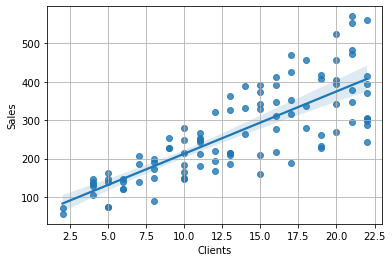

In [39]:
#1. scatterplot showing sales vs. number of clients; with regression line - fit_reg

sns.regplot(x = df["Clients"], y = df["Sales"], fit_reg = True)

plt.grid()

Text(0.5, 1.0, 'Sales vs. Number of Clients')

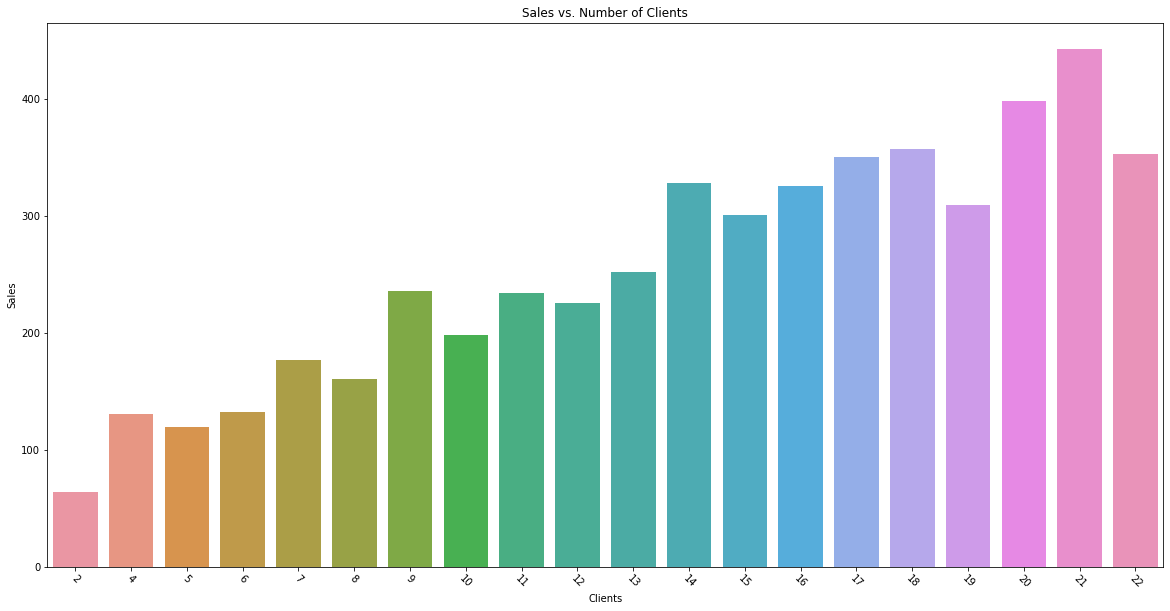

In [41]:
#2. barplot showing the sales by number of clients

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "Clients", y = "Sales", ci = None)

plt.xticks(rotation = -45)
plt.title('Sales vs. Number of Clients')

# would be better with binning

Text(0.5, 1.0, 'Sales vs. Number of Calls to Each Client')

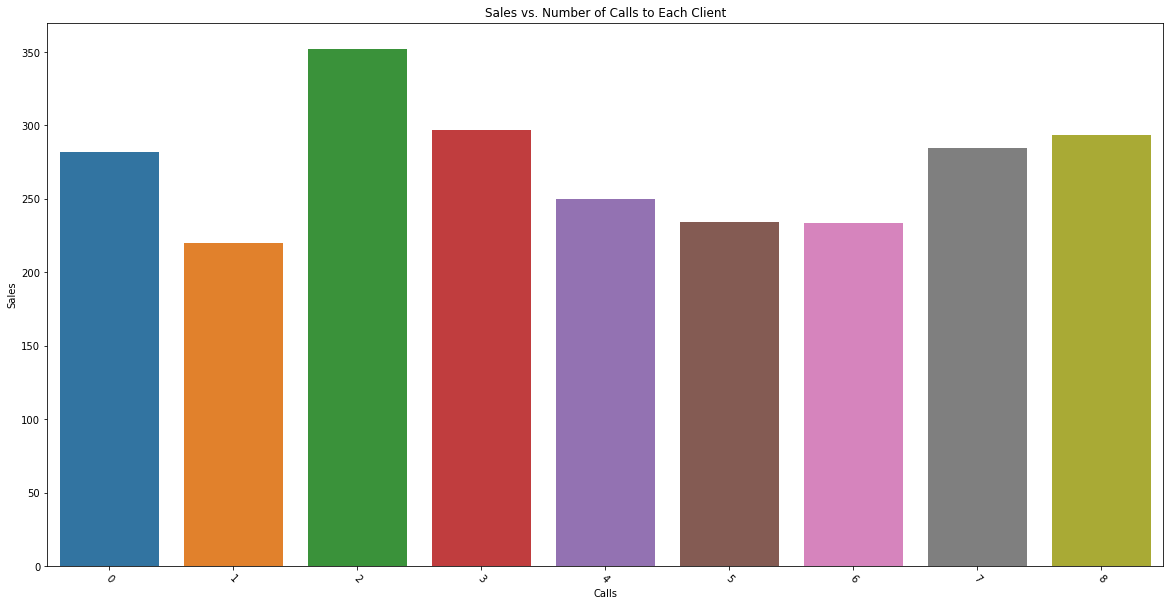

In [42]:
#3. barplot showing the sales by number of calls

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "Calls", y = "Sales", ci = None)

plt.xticks(rotation = -45)
plt.title('Sales vs. Number of Calls to Each Client')

# shows an ideal number of calls beyond which it no longer helps to call

Text(0.5, 1.0, 'Sales vs. Number of Emails to Each Client')

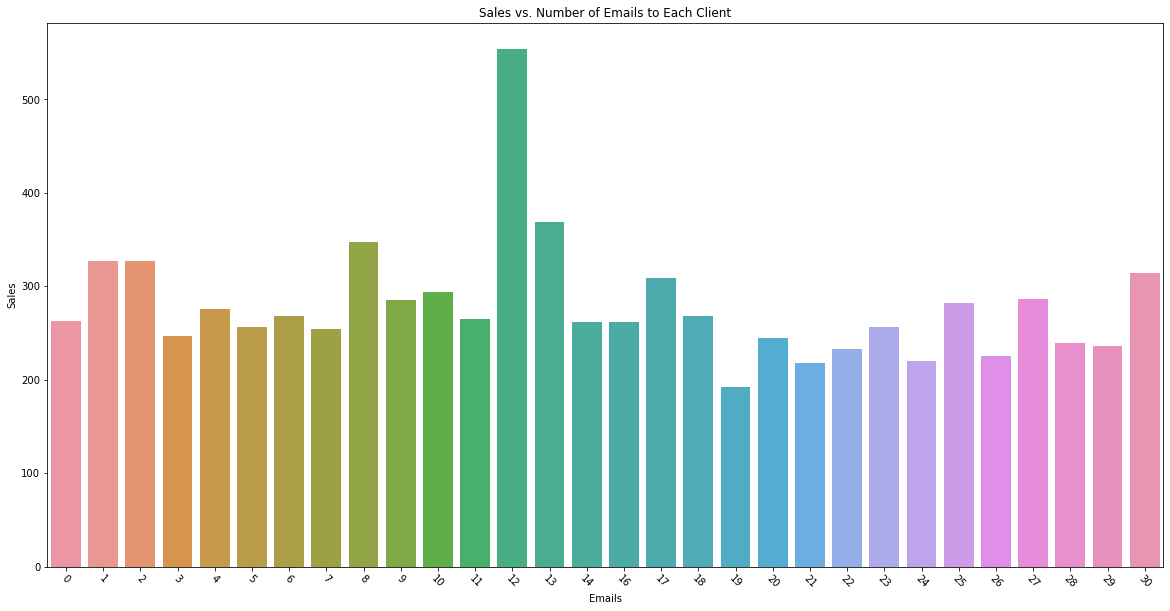

In [43]:
#4. barplot showing the sales by number of emails

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "Emails", y = "Sales", ci = None)

plt.xticks(rotation = -45)
plt.title('Sales vs. Number of Emails to Each Client')

# better with binning
# this is strange

Text(0.5, 1.0, 'Sales vs. Number of Businesses')

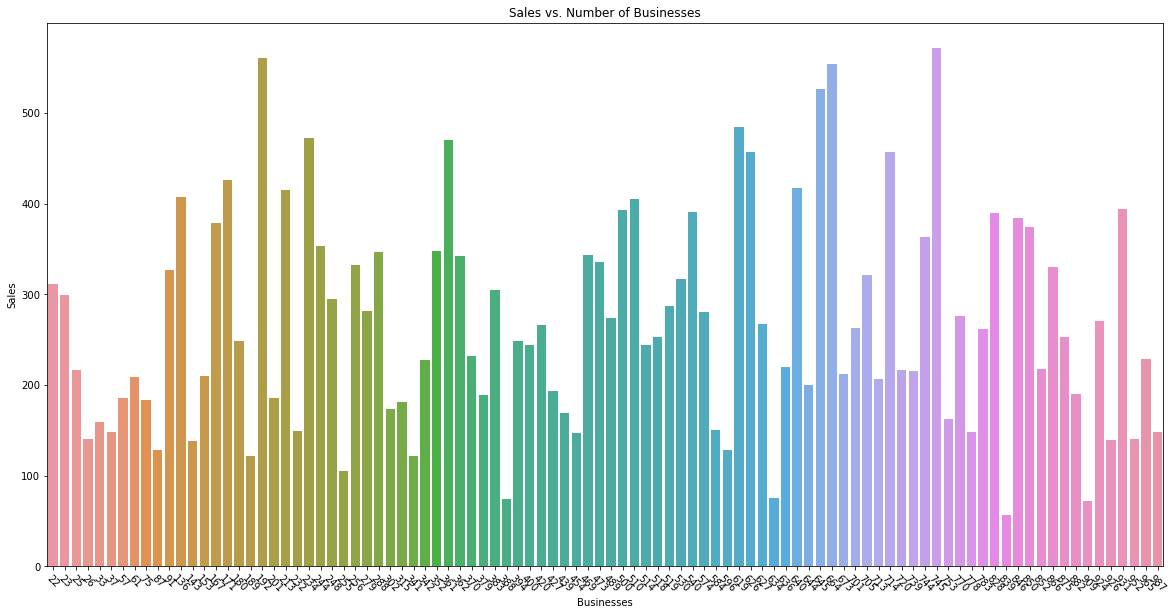

In [46]:
#5. barplot showing the sales by number of businesses

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "Businesses", y = "Sales", ci = None)

plt.xticks(rotation = -45)
plt.title('Sales vs. Number of Businesses')

# better with binning
# this is unhelpful

In [50]:
#6. # Clients vs. Sales

df["Calls"].groupby(df["Clients"]).max()

# increase in # clients correlated with increase in sales

Clients
2     5
4     7
5     7
6     6
7     8
8     8
9     7
10    6
11    6
12    7
13    8
14    8
15    5
16    8
17    7
18    7
19    7
20    7
21    7
22    6
Name: Calls, dtype: int64

# JUST FOR FUN

In [ ]:
#salesperson will keep their job if they sell at least $250,000
#find logistic regression to determine if salesperson will be successful

In [52]:
df["SalesSuccess"] = np.where(df["Sales"]>=250, 1, 0)

In [53]:
df.head()

,Salesperson,District,Region,Sales,# of Clients,Visits to each Client per Month,Calls to each Client per month,Emails to each Client per month,# of businesses in district,zscoreVisits,zscoreCalls,zscoreEmails,zscoreClients,zscoreSales,Clients,Visits,Calls,Emails,Businesses,SalesSuccess
0,Addie Miller,52,A,393,16,2,4,30,500,1.206662,0.069814,1.506995,0.428936,1.034380,16,2,4,30,500,1
1,Addie Miller,67,A,267,11,2,1,14,627,1.206662,1.093746,0.251715,0.428936,0.022394,11,2,1,14,627,1
2,Addie Miller,104,A,148,4,1,1,17,778,0.024626,1.093746,0.078043,1.629956,1.020457,4,1,1,17,778,0
3,Alexandra Jones,49,A,317,17,0,7,1,530,1.255914,1.233374,1.680667,0.600510,0.396961,17,0,7,1,530,1
4,Alonzo Tennant,46,A,276,16,2,2,22,770,1.206662,0.705893,0.627640,0.428936,0.053090,16,2,2,22,770,1


In [ ]:
result5 = sm.log("SalesSuccess ~ Clients +  Visits + Calls + Emails", data = df).fit()
result5.summary()